# Eigenvalue analysis of a beam - analytical solution 

### Description: In some cases a single degree of freedom - SDoF - model can be used to model the structural behaviour. The response of a SDoF system under dynamic loads may be computed by different direct time integration schemes, which are presented here. The results are compared with the analytical solutions from basic structural dynamics. Some exercises are proposed. 

#### Students are advised to complete the exercises. 

##### Project: Structural Wind Engineering WS 21-22 Chair of Structural Analysis @ TUM - M. Péntek, A. Kodakkal, G. Martínez-López
        
Author : anoop.kodakkal@tum.de mate.pentek@tum.de

Created on:  15.11.2015

Last update: 08.11.2021

In [1]:
# import python modules
import time
import matplotlib.pyplot as plt
import numpy as np

# import own modules
#import structure_sdof as s_sdof

###### Structural setup 

In [2]:
# mass per unit length 
m = 3.9888 # kg 
L = 0.4 # m 
E = 1e9 # N/m2
I = 1.215e-8 # m4
A = 0.0018 #m2
xi = 0.00 
# density 
rho = m/L/A
# the values of the beam is taken from 
#https://functionbay.com/documentation/onlinehelp/default.htm#!Documents/acantileverbeam.htm 

######  analytical natural frequency 

Table D2 in http://www.vibrationdata.com/tutorials2/EffectiveModalMass.pdf

In [3]:
frequnecy_const = np.sqrt(E*I/rho/A/L**4)
frequency_coeff = [1.87510, 4.69409, 7.854760, 7*np.pi/2]
frequency = np.square(frequency_coeff)*frequnecy_const

print(frequency)

[ 24.25637449 152.01269044 425.64041804 834.08988681]


######  analytical mode shape  

Table 9.1 in Peterson page 600

In [4]:
A_coeff = [1.362220, 0.981868, 1.000776, 1]
zeta = np.arange(0,1, 1e-3)

First eigen mode

In [5]:
mode_n = 1
mode_shape = np.sin(zeta*frequency_coeff[mode_n-1])-np.sinh(zeta*frequency_coeff[mode_n-1])\
            + A_coeff[mode_n-1] * (np.cosh(zeta*frequency_coeff[mode_n-1])-np.cos(zeta*frequency_coeff[mode_n-1]))

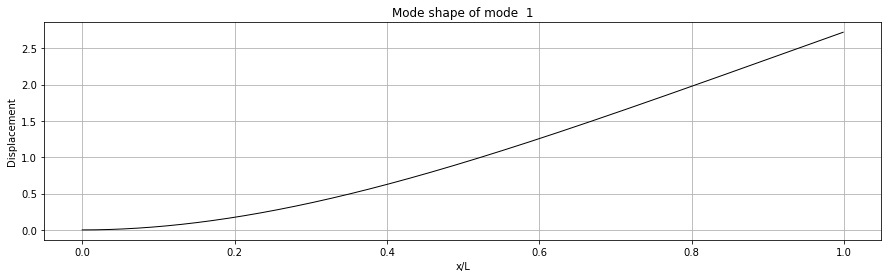

In [6]:
plt.figure(num=3, figsize=(15, 4))
plt.title('Mode shape of mode  '+str(mode_n))
plt.plot(zeta, mode_shape, "-k", lw=1)
# plt.xlim([0, x_axis_end])
plt.ylabel('Displacement')
plt.xlabel('x/L')
plt.grid()